# Aviation Accidents Analysis - Phase 1 Project


## 1. Project Overview 
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.



## 2. Defining the Question
**Problem Statement :** *Determine which aircraft are the lowest risk for the company to purchase and operate, providing actionable insights for decision-making.*

### Defining the Metrics of Success

* Incident Frequency: Number of incidents per aircraft make/model.
* Severity of Incidents: Categorized by total fatalities, serious injuries, minor injuries, and uninjured passengers.
* Aircraft Damage: Types of damage recorded (e.g., destroyed, substantial, minor).
* Phase of Flight: Common phases during which incidents occur (e.g., landing, takeoff).
* Weather Conditions: Incidents correlated with different weather conditions.



### Data Understanding

In this project, we will be working with a [Kaggle dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

The data is contained is two separate CSV files: 
1. `AviationData.csv`: each record represents data about an accident that occurred with attributes such ad date, Location etc...
2. `USState_Codes.csv`: the state name and its associated abbreviation

To answer our question, relevant columns include model, make, number of accidents/incidents and severity

   

## 3. Reading the data

In [1]:
#import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data into a dataframe
pd.set_option('display.max_columns', None)
df = pd.read_csv('AviationData.csv', encoding= 'latin1', low_memory = False)

#preview top 5 records of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#loading the other dataset
state_codes = pd.read_csv('USState_Codes.csv')
state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
#getting an overview of our data's structure and completeness i.e.,columns names, non-null counts and datatypes
state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


Given the large number of columns available in our dataset, I will not be using all of them in this analysis. Therefore, I select the relevant ones and store them in a new dataframe.

In [5]:
#select the columns relevant in answering our business question
relevant_columns = ['Event.Id', 'Event.Date', 'Location','Investigation.Type', 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',  'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Weather.Condition', 'Broad.phase.of.flight']
aviation_data = df[relevant_columns]

In [6]:
# Convert the 'Event.Date' column to datetime format
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])

C:\Users\Banda\AppData\Local\Temp\ipykernel_14668\969757689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])


In [7]:
#getting an overview of our data's structure and completeness i.e.,columns names, non-null counts and datatypes
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Location                88837 non-null  object        
 3   Investigation.Type      88889 non-null  object        
 4   Injury.Severity         87889 non-null  object        
 5   Aircraft.damage         85695 non-null  object        
 6   Make                    88826 non-null  object        
 7   Model                   88797 non-null  object        
 8   Total.Fatal.Injuries    77488 non-null  float64       
 9   Total.Serious.Injuries  76379 non-null  float64       
 10  Total.Minor.Injuries    76956 non-null  float64       
 11  Total.Uninjured         82977 non-null  float64       
 12  Weather.Condition       84397 non-null  object

In [8]:
#check for duplicates and drop them
aviation_data = aviation_data.drop_duplicates()
# aviation_data.shape

In [9]:
#code for checking the number of missing values
aviation_data.isna().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Investigation.Type            0
Injury.Severity             999
Aircraft.damage            3191
Make                         63
Model                        92
Total.Fatal.Injuries      11398
Total.Serious.Injuries    12503
Total.Minor.Injuries      11926
Total.Uninjured            5908
Weather.Condition          4491
Broad.phase.of.flight     27161
dtype: int64

## 4. Tidying the Dataset

### **Question 1:** *What is the distribution of incidents per make/model of aircraft?*

to determine which aircraft make/model combination have the lowest risk, we need to calculate the incident rate for each and then see the lowest.


 There are missing values in the `Make` and `Model` columns. 


The `Make` and `Model` columns contain 63 and 92 missing values respectively, which represents 0.07% & 0.1% of the total records respectively. For this 
Part, I am choosing to drop the null values as it ensures that the data remains complete without significantly impacting the dataset size.
I thought about imputing missing values by mapping the model column to the make column such that if the model is missing and we have another column
with the same make, we could fill the missing value with that.  However, it is important to note that aircrafts can be the same make and different 
models. Therefore, this would have introduced a bias. 

In [10]:
aviation_cleaned = aviation_data.dropna(subset = ['Make', 'Model'])
# aviation_cleaned..head()

In [11]:
aviation_cleaned.shape

(88744, 14)

Now using the `value_counts()` method, Let's check the distribution of data i.e., unique make and frequency of each.

In [12]:
# Number of incidents per model
make_counts = aviation_cleaned['Make'].value_counts()
make_counts

Make
Cessna           22219
Piper            12028
CESSNA            4918
Beech             4330
PIPER             2840
                 ...  
Conrad Menzel        1
Blucher              1
Gideon               1
Brault               1
ROYSE RALPH L        1
Name: count, Length: 8224, dtype: int64

Now from what we can see, we notice that we have same Makes but different capitalization e.g., (`Cessna` & `CESSNA`, `PIPER` & `Piper`). I decided to convert all the Strings in the `Make` column into Capitalized case to ensure uniformity. Moreover, it is noted that  `Hawker beech`,`Hawker beechcraft corp.` & `Hawker beechcraft corporation` all which refer to the same make but treated differently in this case. So I will Unify them as well.

In [13]:
#capitalize aviation makes to promote uniformity
aviation_cleaned.loc[:, 'Make'] = aviation_cleaned['Make'].str.capitalize()

#remove any trailing and leading spaces 
aviation_cleaned.loc[:, 'Make'] = aviation_cleaned['Make'].str.strip()


In [14]:

'''This line of code will replace all variations of 'Hawker beech' with 'Hawker beechcraft', including 'Hawker beechcraft corp.', 'Hawker beechcraft 
corporation', and any other variations in the 'Make' column of your DataFrame df. The regular expression r'Hawker\s*beech.*' 
matches any string that starts with 'Hawker beech' followed by zero or more whitespace characters (\s*) and any other characters (.*).'''

# Replace variations of 'Hawker' and 'Hawker beech' with 'Hawker beechcraft'
aviation_cleaned.loc[:, 'Make'] = aviation_cleaned['Make'].str.replace(r'(Hawker\s*beech|Hawker|Beech|Hawker beachcraftcraft)', 'Hawker beechcraft', regex=True)




While trying to plot the distribution of the `Make` column, I ran into an error `FutureWarning: use_inf_as_na option is deprecated and 
will be removed in a future version. Convert inf values to NaN before operating instead.` This is likely due to the Make column containing a large number of unique categories, which can make it difficult to visualize thus not producing a meaningful histogram/barplot.  Therefore, I decided to plot a sample of the whole, like the top 20.

In [15]:
aviation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88744 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88744 non-null  object        
 1   Event.Date              88744 non-null  datetime64[ns]
 2   Location                88692 non-null  object        
 3   Investigation.Type      88744 non-null  object        
 4   Injury.Severity         87766 non-null  object        
 5   Aircraft.damage         85575 non-null  object        
 6   Make                    88744 non-null  object        
 7   Model                   88744 non-null  object        
 8   Total.Fatal.Injuries    77361 non-null  float64       
 9   Total.Serious.Injuries  76261 non-null  float64       
 10  Total.Minor.Injuries    76837 non-null  float64       
 11  Total.Uninjured         82851 non-null  float64       
 12  Weather.Condition       84306 non-null  object     

In [16]:
# Count the number of incidents per make
make_counts = aviation_cleaned['Make'].value_counts()

In [17]:
# Let's get the top 20 makes to keep the plot readable
top_make_counts = make_counts.head(20)
top_make_counts

Make
Cessna               27137
Piper                14868
Hawker beechcraft     5384
Boeing                2732
Bell                  2720
Mooney                1334
Robinson              1227
Grumman               1171
Bellanca              1045
Hughes                 932
Schweizer              773
Air tractor            691
Aeronca                636
Mcdonnell douglas      607
Maule                  589
Champion               519
Stinson                439
Aero commander         428
De havilland           421
Luscombe               414
Name: count, dtype: int64

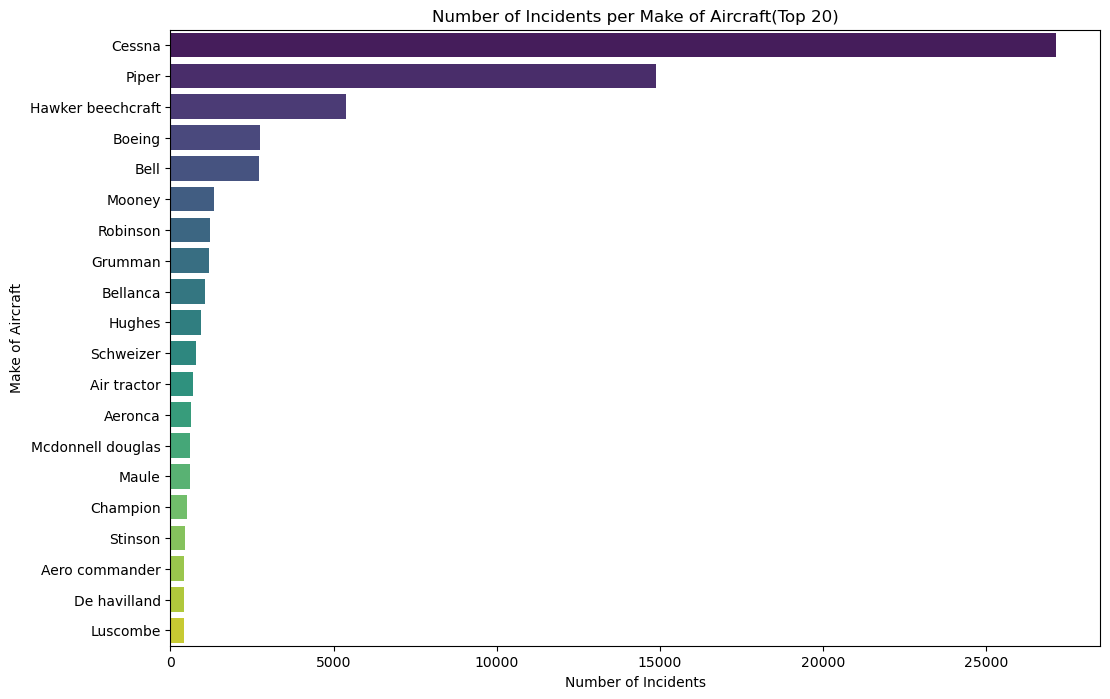

In [18]:
# Plot the bar plot for the top makes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_make_counts.values, y=top_make_counts.index, palette='viridis')
plt.title('Number of Incidents per Make of Aircraft(Top 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Make of Aircraft');



Apply standardization for the `Model` column. For this, I am going to capitalize everything.

In [19]:
#capitalize aviation makes to promote uniformity
aviation_cleaned.loc[:, 'Model'] = aviation_cleaned['Model'].str.upper()

In [20]:
#count number of incidents per aircraft model
model_counts = aviation_cleaned['Model'].value_counts()
#let's get the 20 most common models 
top_20_models = model_counts.head(20)

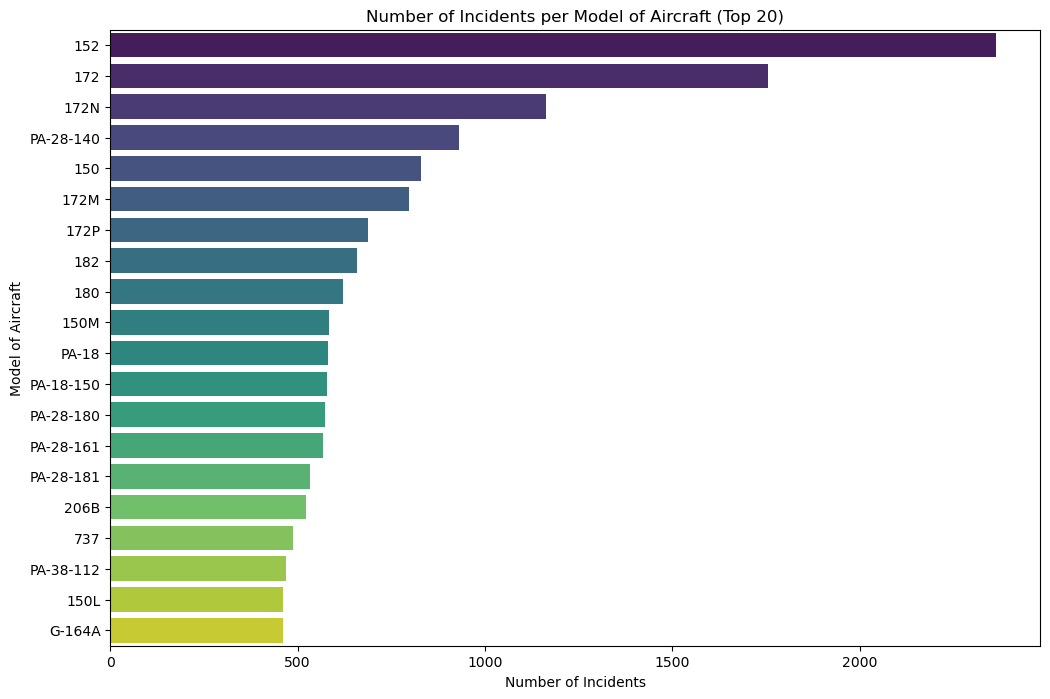

In [21]:
# Plot the bar plot for the top makes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_models.values, y=top_20_models.index, palette='viridis')
plt.title('Number of Incidents per Model of Aircraft (Top 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Model of Aircraft');


In [22]:
incident_counts = aviation_cleaned.groupby(['Make', 'Model']).size().reset_index(name='Incident.Count')

# Display the top 10 aircraft with the highest incident count
print(incident_counts.sort_values(by='Incident.Count', ascending=False).head(20))


                    Make      Model  Incident.Count
4038              Cessna        152            2363
4062              Cessna        172            1752
4113              Cessna       172N            1163
13396              Piper  PA-28-140             931
4011              Cessna        150             829
4111              Cessna       172M             798
4116              Cessna       172P             687
4170              Cessna        182             659
4146              Cessna        180             621
4037              Cessna       150M             585
13288              Piper      PA-18             578
13406              Piper  PA-28-180             572
13297              Piper  PA-18-150             571
13405              Piper  PA-28-161             565
13413              Piper  PA-28-181             529
1961                Bell       206B             515
2597              Boeing        737             488
13553              Piper  PA-38-112             468
4036        

In [23]:
# incident_counts['Incident.Count'].unique()
# incident_counts.shape

Now let's visualize the number of incidents per make/model. And since we want the lowest risk i.e., with lower incidents, we will plot for the lowest 20. 

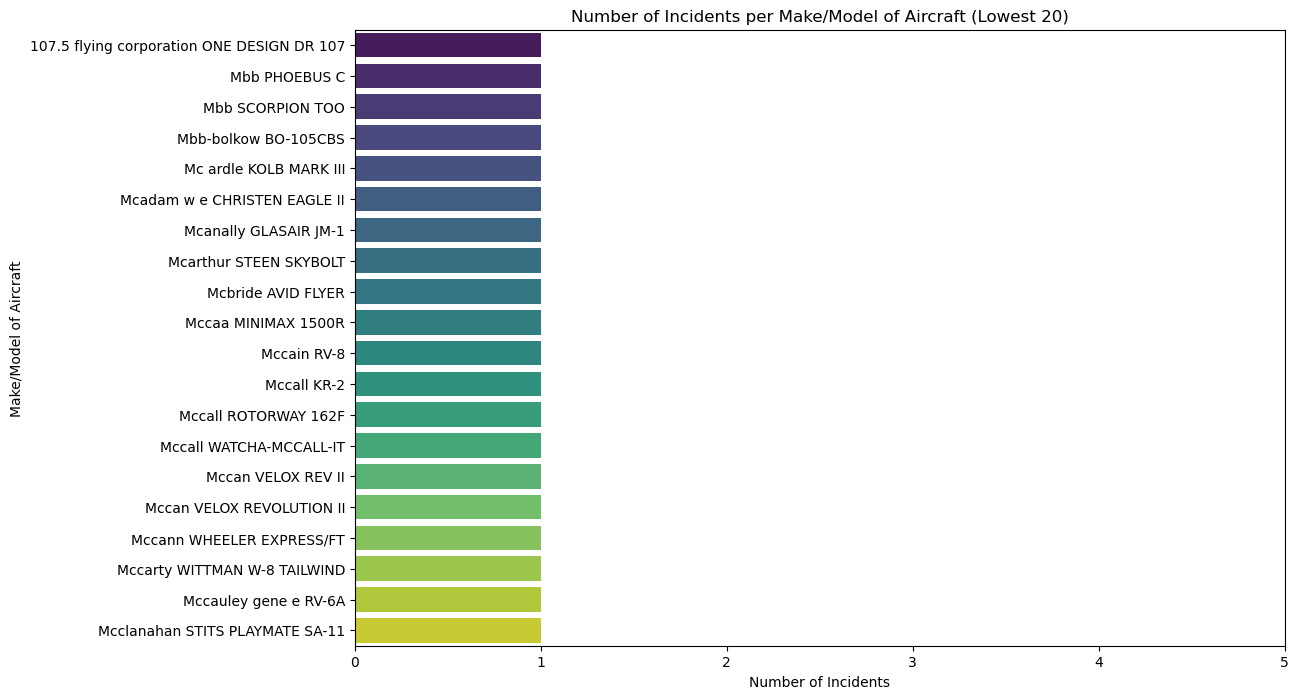

In [24]:
# Sort by 'Incident Count' and select the lowest 20
lowest_20_incidents = incident_counts.sort_values(by='Incident.Count').head(20)

# Combine 'Make' and 'Model' into a single column for better visualization
lowest_20_incidents['Make/Model'] = lowest_20_incidents['Make'] + ' ' + lowest_20_incidents['Model']

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Incident.Count', y='Make/Model', data=lowest_20_incidents, palette='viridis')
plt.title('Number of Incidents per Make/Model of Aircraft (Lowest 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Make/Model of Aircraft')
plt.xlim(0, 5);


We notice that we have several Make/Model aircraft combinations with just 1 incident. This becomes difficult to select as there is no way to differentiate them. We would use Incident Rate to further drill down this analysis. However, we have no idea on the total flight hours or trips taken.

### **Question 2:** *What is the Severity of Injuries per Make/Model ?*

We notice that unique column names  are 109. Also,of importance to note is that there is different variations of Fatal with number of fatalities enclosed. These are all treated as separate and unique entries. So first, I decided to replace any value that has `Fatal ` to be in the same Category. Moreover, I Handle missing values by putting them into a different category.

In [25]:
aviation_cleaned['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67290
Fatal(1)       6157
Fatal          5248
Fatal(2)       3698
Incident       2209
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

In [26]:
aviation_cleaned['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [27]:
# # Iterate through each row
# for index, row in aviation_cleaned.iterrows():
#     severity = row['Injury.Severity']
#     total_fatal_injuries = row['Total.Fatal.Injuries']
    
#     # Check if severity is a string and indicates a fatal incident
#     if isinstance(severity, str) and 'Fatal' in severity:
#         # Split the severity string by '(' and ')'
#         parts = severity.split('(')
#         if len(parts) == 2:
#             num_in_brackets = int(parts[1].split(')')[0])
            
#             # Compare it with the Total.Fatal.Injuries column
#             if num_in_brackets != total_fatal_injuries:
#                 # Update the Injury.Severity column if they don't match
#                 aviation_cleaned.at[index, 'Injury.Severity'] = f'Fatal({total_fatal_injuries})'

# # Save the updated DataFrame back to a CSV file or use it for further analysis
# aviation_cleaned.to_csv('updated_aviation_data.csv', index=False)

In [28]:
aviation_cleaned.head(10)

,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Accident,Fatal(2),Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Accident,Fatal(4),Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Accident,Fatal(3),Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Accident,Fatal(2),Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Accident,Fatal(1),Destroyed,Cessna,501,1.0,2.0,NaN,0.0,VMC,Approach
5,20170710X52551,1979-09-17,"BOSTON, MA",Accident,Non-Fatal,Substantial,Mcdonnell douglas,DC9,NaN,NaN,1.0,44.0,VMC,Climb
6,20001218X45446,1981-08-01,"COTTON, MN",Accident,Fatal(4),Destroyed,Cessna,180,4.0,0.0,0.0,0.0,IMC,Unknown
7,20020909X01562,1982-01-01,"PULLMAN, WA",Accident,Non-Fatal,Substantial,Cessna,140,0.0,0.0,0.0,2.0,VMC,Takeoff
8,20020909X01561,1982-01-01,"EAST HANOVER, NJ",Accident,Non-Fatal,Substantial,Cessna,401B,0.0,0.0,0.0,2.0,IMC,Landing
9,20020909X01560,1982-01-01,"JACKSONVILLE, FL",Accident,Non-Fatal,Substantial,North american,NAVION L-17B,0.0,0.0,3.0,0.0,IMC,Cruise


In [29]:
#check the unique entries in our injury severity column.
aviation_cleaned['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [30]:
#using np.where to identify entries with `fatal()` and replace it with Fatal as it's category.
#first create a copy of the dataframe
aviation_cleaned_copy = aviation_cleaned.copy()

#replace any value containing 'Fatal' to create a different category 
aviation_cleaned_copy['Injury.Severity'] = np.where(aviation_cleaned_copy['Injury.Severity'].str.contains('Fatal', na = False), 'Fatal' , aviation_cleaned_copy['Injury.Severity']) 


In [31]:
# Notice that it has 979 missing values. Instead of dropping these values, I
# decided to keep them and give them a class of their own 'Unkown'
aviation_cleaned_copy['Injury.Severity'] = aviation_cleaned_copy['Injury.Severity'].fillna('Unknown')

#preview data to check if changes have taken place
aviation_cleaned_copy.head()


,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Accident,Fatal,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Accident,Fatal,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Accident,Fatal,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Accident,Fatal,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Accident,Fatal,Destroyed,Cessna,501,1.0,2.0,NaN,0.0,VMC,Approach


In [32]:
aviation_cleaned_copy.isnull().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Investigation.Type            0
Injury.Severity               0
Aircraft.damage            3169
Make                          0
Model                         0
Total.Fatal.Injuries      11383
Total.Serious.Injuries    12483
Total.Minor.Injuries      11907
Total.Uninjured            5893
Weather.Condition          4438
Broad.phase.of.flight     27090
dtype: int64

In [33]:
aviation_cleaned_copy['Injury.Severity'].value_counts()

Injury.Severity
Fatal          85072
Incident        2209
Unknown          978
Minor            217
Serious          173
Unavailable       95
Name: count, dtype: int64

Next, I create a histogram to see the distribution of Severity of incidents

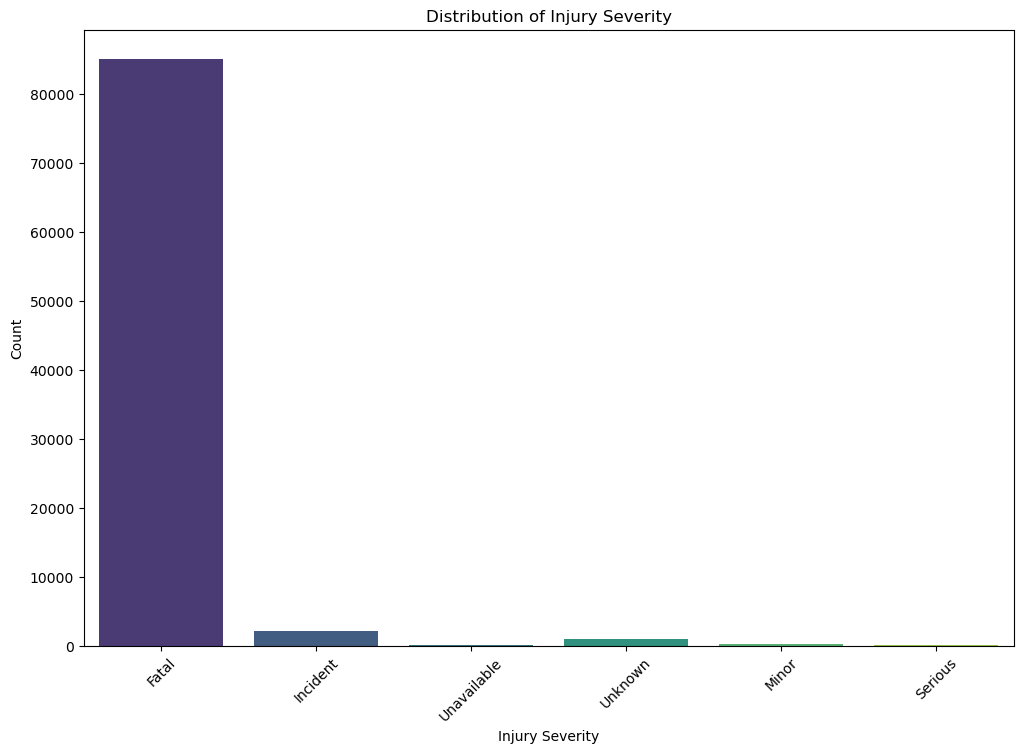

In [34]:
# Plot the distribution of injury severity

plt.figure(figsize=(12, 8))
sns.countplot(data=aviation_cleaned_copy, x='Injury.Severity', palette='viridis')
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.xticks(rotation=45);


From the plot above, most aircraft accidents/incidents result in fatalities. 
Now, we need to investigate the Injury Severity per Make/Model.

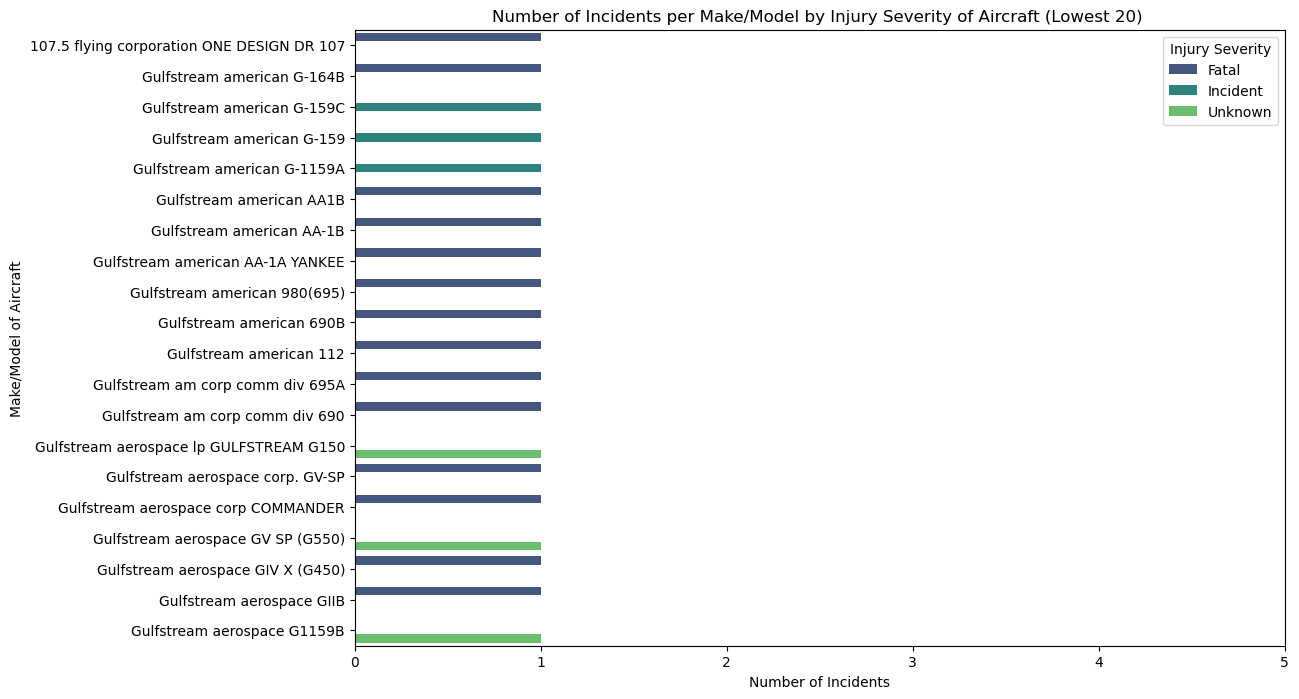

In [35]:
#plot graph to show injury severity per Make/Model. We will take the least 20 .

plt.figure(figsize=(12,8))
# Merge the two DataFrames on 'Make' and 'Model'
merged_df = pd.merge(incident_counts, aviation_cleaned_copy, on=['Make', 'Model'])

# Sort by 'Incident Count' and select the lowest 20
lowest_20_incidents = merged_df.sort_values(by='Incident.Count').head(20)

# Combine 'Make' and 'Model' into a single column for better visualization
lowest_20_incidents['Make/Model'] = lowest_20_incidents['Make'] + ' ' + lowest_20_incidents['Model']

# Plot the bar plot
sns.barplot(x='Incident.Count', y='Make/Model',hue='Injury.Severity', data=lowest_20_incidents, palette='viridis');
plt.title('Number of Incidents per Make/Model by Injury Severity of Aircraft (Lowest 20) ')
plt.xlabel('Number of Incidents')
plt.ylabel('Make/Model of Aircraft')
plt.legend(title='Injury Severity');
plt.xlim(0, 5);

From the above plot, we notice that aircrafts of the . 

In [36]:
# low = merged_df[merged_df['Incident.Count'] == 1]
# low.count()   we have 13,906 Make/Model Combinations with an Incident Count of 1. How do we choose from this?

### **Question 3:** *What is the distribution of aircraft damage per Make/Model?*



In [37]:
aviation_cleaned_copy3 = aviation_cleaned_copy.copy()

aviation_cleaned_copy3['Aircraft.damage'].unique() # from this, we notice that there are different categories for null and Unkown

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [38]:
#replace null values with 'Missing'
aviation_cleaned_copy3['Aircraft.damage'] = aviation_cleaned_copy3['Aircraft.damage'].fillna('Missing')

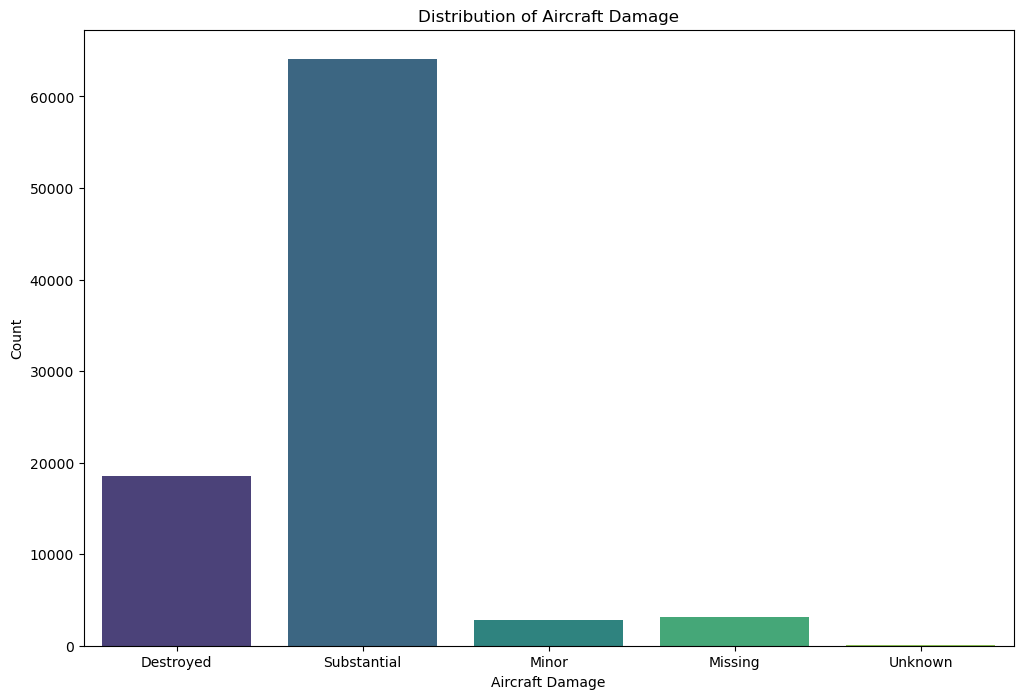

In [39]:
#plot distribution of aircraft damage

plt.figure(figsize=(12, 8))
sns.countplot(data=aviation_cleaned_copy3, x='Aircraft.damage', palette='viridis')
plt.title('Distribution of Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count');


We notice that most aircrafts sustained `Substantial` damage in the event of an incident.

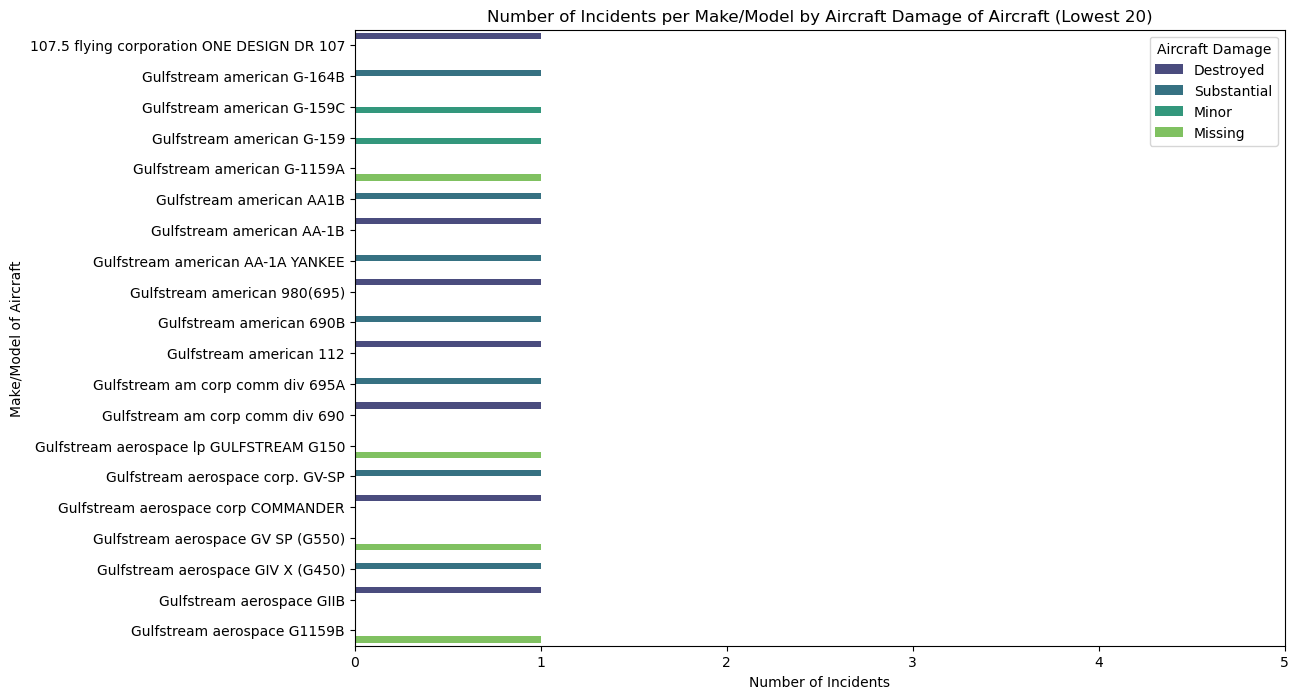

In [40]:
#now plot the distribution of Aircraft damage per Make/Model


plt.figure(figsize=(12,8))
# Merge the two DataFrames on 'Make' and 'Model'
merged_damage = pd.merge(incident_counts, aviation_cleaned_copy3, on=['Make', 'Model'])
# Sort by 'Incident Count' and select the lowest 20
lowest_20_incidents = merged_damage.sort_values(by='Incident.Count').head(20)

# Combine 'Make' and 'Model' into a single column for better visualization
lowest_20_incidents['Make/Model'] = lowest_20_incidents['Make'] + ' ' + lowest_20_incidents['Model']

# Plot the bar plot
sns.barplot(x='Incident.Count', y='Make/Model',hue='Aircraft.damage', data=lowest_20_incidents, palette='viridis');
plt.title('Number of Incidents per Make/Model by Aircraft Damage of Aircraft (Lowest 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Make/Model of Aircraft')
plt.legend(title='Aircraft Damage');
plt.xlim(0, 5);


### **Question 4:** *Distribution of which Phase of Flight Accidents/incidents commomly occur?*

In [41]:
aviation_cleaned_copy4 = aviation_cleaned_copy3.copy()

aviation_cleaned_copy4['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15421
Takeoff        12479
Cruise         10259
Maneuvering     8129
Approach        6534
Climb           2030
Taxi            1953
Descent         1886
Go-around       1353
Standing         943
Unknown          548
Other            119
Name: count, dtype: int64

In [42]:
#create a category to for missing data
aviation_cleaned_copy4['Broad.phase.of.flight'] = aviation_cleaned_copy4['Broad.phase.of.flight'].fillna('Missing')

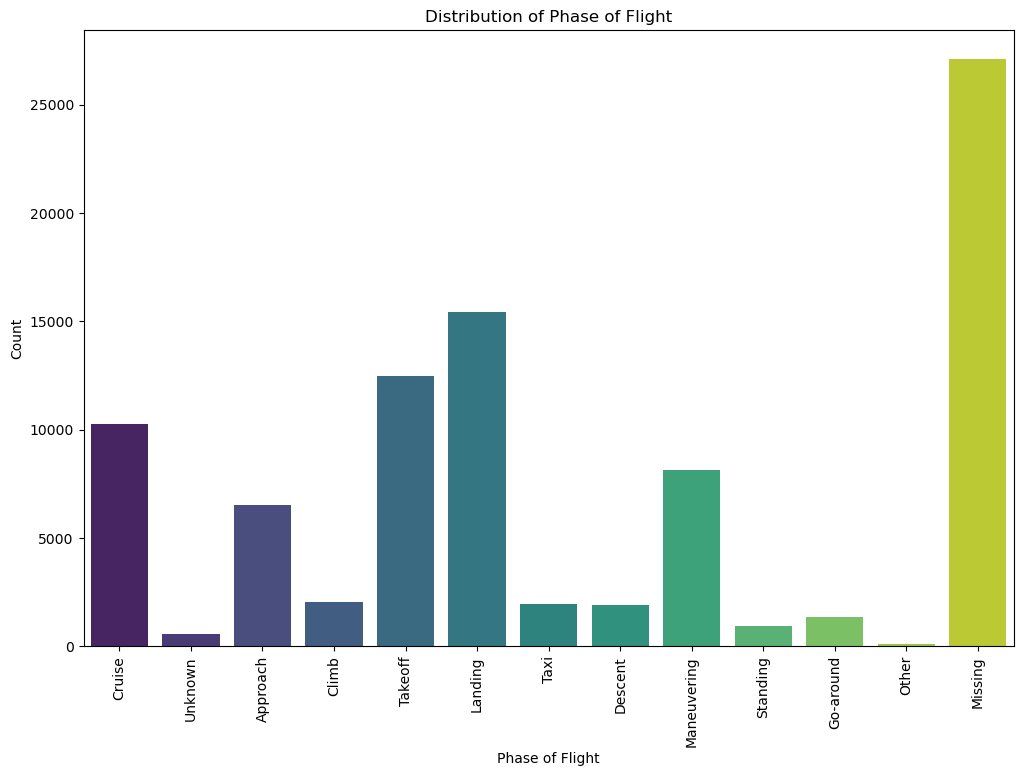

In [43]:
#plot graph to show distribution of when incidents occur

plt.figure(figsize=(12, 8))
sns.countplot(data=aviation_cleaned_copy4, x='Broad.phase.of.flight', palette='viridis')
plt.title('Distribution of Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Count')
plt.xticks(rotation = 90);


It is important to note that majority of this data is missing. It might therefore not provide a clear picture for interpretation

### **Question 5:** *What is the distribution of Weather Conditions when Incidents occur?*

In [44]:
aviation_cleaned_copy5 = aviation_cleaned_copy4.copy()
aviation_cleaned_copy5['Weather.Condition'].value_counts()

Weather.Condition
VMC    77221
IMC     5970
UNK      853
Unk      262
Name: count, dtype: int64

In [45]:
#we notice that 5% of our data for the Weather condition is missing. While it is not substantial, it is a good number. 
aviation_cleaned_copy5['Weather.Condition'].isnull().sum() / len(aviation_cleaned_copy5['Weather.Condition'])*100 # find % of missing data

5.000901469395114

`IMC (Incident Meteorological Conditions)` - refers to weather conditions where pilots are not allowed to fly on their own, hence require use of instruments, typically cloudy or low visibility. 
`VMC (Visual Meteorological Conditions)` - refers to weather conditions under which pilots have sufficient visibility to fly aircraft relying on visual references.

It is important to notice that we have (`UNK` and `Unk`)  as 2 separate entries. I decided to capitalize everything and thus have them as the same
category. For this assessment, I am going to assume that `UNK` refers to `UNKOWN` as I did not find it's definition anywhere.
Now, to deal with missing values, I decided to have a separate category for them


In [46]:
# convert strings into uppercase for uniformity
aviation_cleaned_copy5.loc[:, 'Weather.Condition'] = aviation_cleaned_copy5['Weather.Condition'].str.upper()

aviation_cleaned_copy5['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan], dtype=object)

In [47]:
aviation_cleaned_copy5['Weather.Condition'] = aviation_cleaned_copy5['Weather.Condition'].fillna('Missing')

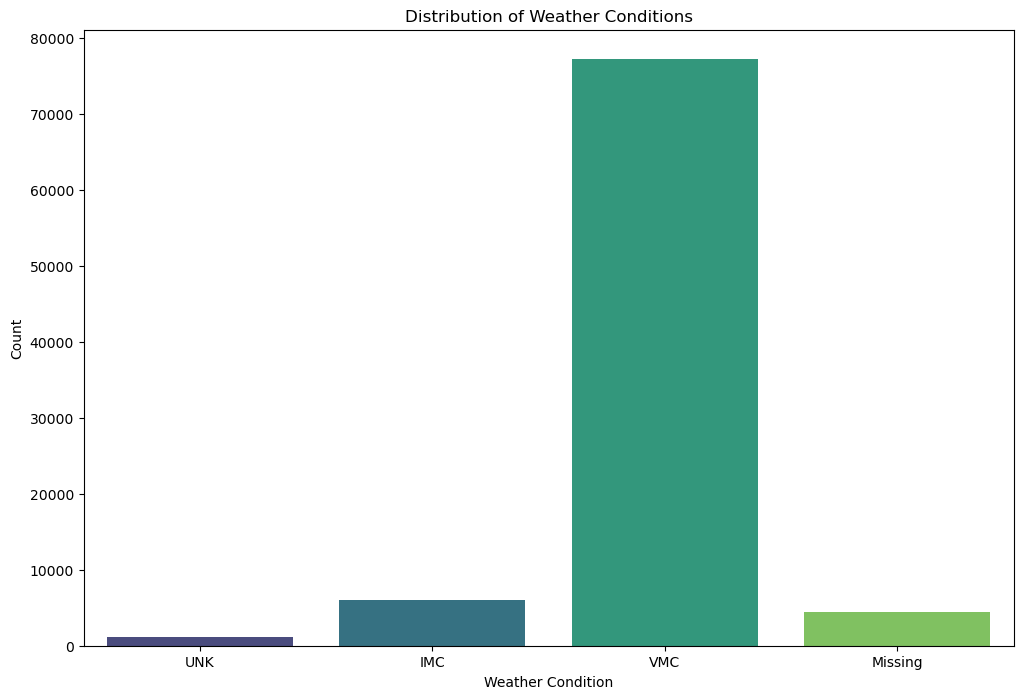

In [48]:
#plot graph to show distribtion of weather patterns during the occurrence of incidents

plt.figure(figsize=(12, 8))
sns.countplot(data=aviation_cleaned_copy5, x='Weather.Condition', palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count');


Most Incidents/Accidents occurred in VMC 

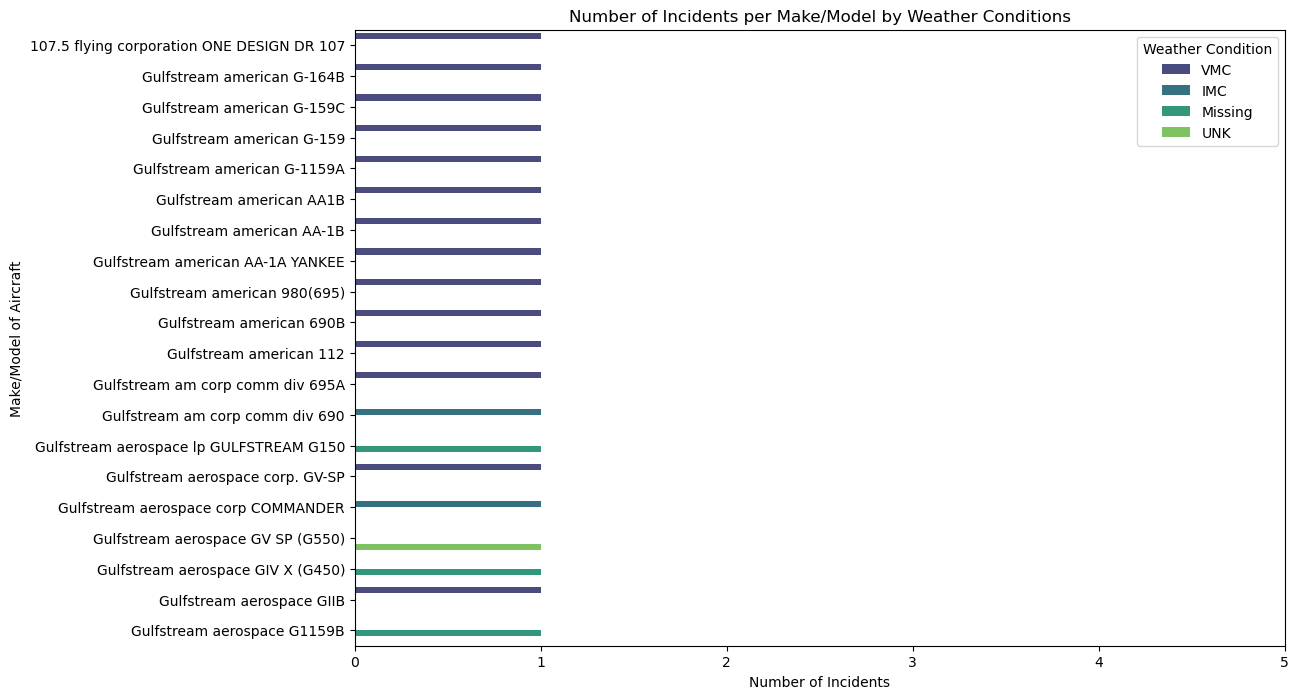

In [49]:
#plot distribution of incidents and taking weather conditions into account
plt.figure(figsize=(12,8))
# Merge the two DataFrames on 'Make' and 'Model'
merged_weather= pd.merge(incident_counts, aviation_cleaned_copy5, on=['Make', 'Model'])
# Sort by 'Incident Count' and select the lowest 20
lowest_20_incidents = merged_weather.sort_values(by='Incident.Count').head(20)

# Combine 'Make' and 'Model' into a single column for better visualization
lowest_20_incidents['Make/Model'] = lowest_20_incidents['Make'] + ' ' + lowest_20_incidents['Model']

# Plot the bar plot
sns.barplot(x='Incident.Count', y='Make/Model',hue='Weather.Condition', data=lowest_20_incidents, palette='viridis');
plt.title('Number of Incidents per Make/Model by Weather Conditions')
plt.xlabel('Number of Incidents')
plt.ylabel('Make/Model of Aircraft')
plt.legend(title='Weather Condition');
plt.xlim(0, 5);

The graph above shows the lowest 20 Make/Model combinations by incident Count and the weather conditions under which their accidents/incidents occurred.

### **Question 6:** *What is the Risk Score of each Make/Model Combination?*

The European Aviation Safety Agency (EASA) developed the European Risk Classification Scheme (ERCS) methodology, designed to risk-classify all reported occurrences. This methodology calculates risk  by taking in two variables: Severity and Likelihood of Occurrence(how often similar incidents occur). 
To get the likelihood of occurrence, we count the number of incidents for each 'Make' and 'Model' combination. More frequent incidents imply higher likelihood.

In [50]:
aviation_cleaned_copy6 = aviation_cleaned_copy5.copy()

#fill missing values with 0, in injuries columns
columns_to_fill = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
aviation_cleaned_copy6[columns_to_fill ] = aviation_cleaned_copy6[columns_to_fill ].fillna(0)

In [51]:
'''The following function calculates the severity score by taking into account the total number of people and weighted injuries. 
This approach normalizes the score and avoids negative scores while also taking into account the uninjured. This is because if no fatalities are
recorded,it is slightly less severe than in the case of fatalities'''

def calculate_risk_score(row):
    total_people = (row['Total.Fatal.Injuries'] + 
                    row['Total.Serious.Injuries'] + 
                    row['Total.Minor.Injuries'] + 
                    row['Total.Uninjured'])
    
    if total_people == 0:
        return 0  # Avoid division by zero
    
    # Calculate the weighted sum of injuries
    weighted_injuries = (row['Total.Fatal.Injuries'] * 10 + 
                         row['Total.Serious.Injuries'] * 5 + 
                         row['Total.Minor.Injuries'] * 1 +
                         row['Total.Uninjured'] * 0.5
                        )
    
    # Calculate the risk score as a proportion of the total
    severity_score = weighted_injuries / total_people
    
    return severity_score

# Apply the function to the dataframe
aviation_cleaned_copy6['Severity.Score'] = aviation_cleaned_copy6.apply(calculate_risk_score, axis=1)

# Check the results
# aviation_cleaned_copy6[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Severity.Score']].head(10)


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Severity.Score
0,2.0,0.0,0.0,0.0,10.000000
1,4.0,0.0,0.0,0.0,10.000000
2,3.0,0.0,0.0,0.0,10.000000
3,2.0,0.0,0.0,0.0,10.000000
4,1.0,2.0,0.0,0.0,6.666667
5,0.0,0.0,1.0,44.0,0.511111
6,4.0,0.0,0.0,0.0,10.000000
7,0.0,0.0,0.0,2.0,0.500000
8,0.0,0.0,0.0,2.0,0.500000
9,0.0,0.0,3.0,0.0,1.000000


In [53]:

# Merge counts back into the main DataFrame
aviation_cleaned_copy6 = aviation_cleaned_copy6.merge(incident_counts, on=['Make', 'Model'])

# Normalize incident counts to likelihood scores between 1 and 5
aviation_cleaned_copy6['Likelihood.Score'] = pd.cut(aviation_cleaned_copy6['Incident.Count'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)


In [54]:
# Calculate the ERCS score
aviation_cleaned_copy6['ERCS.Score'] = aviation_cleaned_copy6['Severity.Score'] * aviation_cleaned_copy6['Likelihood.Score']


In [55]:
aviation_cleaned_copy6.tail()

,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Severity.Score,Incident.Count,Likelihood.Score,ERCS.Score
88739,20221227106491,2022-12-26,"Annapolis, MD",Accident,Minor,Missing,Piper,PA-28-151,0.0,1.0,0.0,0.0,Missing,Missing,5.00,177,1,5.00
88740,20221227106494,2022-12-26,"Hampton, NH",Accident,Unknown,Missing,Bellanca,7ECA,0.0,0.0,0.0,0.0,Missing,Missing,0.00,122,1,0.00
88741,20221227106497,2022-12-26,"Payson, AZ",Accident,Fatal,Substantial,American champion aircraft,8GCBC,0.0,0.0,0.0,1.0,VMC,Missing,0.50,14,1,0.50
88742,20221227106498,2022-12-26,"Morgan, UT",Accident,Unknown,Missing,Cessna,210N,0.0,0.0,0.0,0.0,Missing,Missing,0.00,56,1,0.00
88743,20221230106513,2022-12-29,"Athens, GA",Accident,Minor,Missing,Piper,PA-24-260,0.0,1.0,0.0,1.0,Missing,Missing,2.75,118,1,2.75


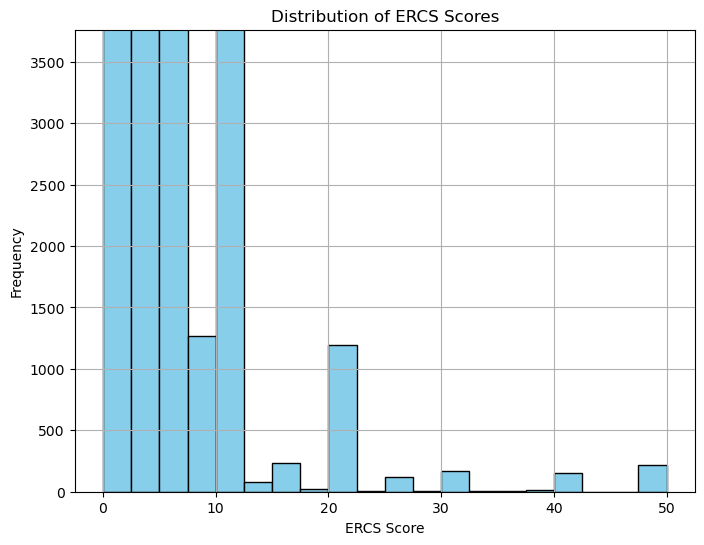

In [56]:
# Create a boxplot of ERCS scores
# Plot histogram of ERCS scores
plt.figure(figsize=(8, 6))
plt.hist(aviation_cleaned_copy6['ERCS.Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of ERCS Scores')
plt.xlabel('ERCS Score')
plt.ylabel('Frequency')
plt.ylim(0, 3760)
plt.grid(True);


From the graph above, we notice that most planes have an ERCS score of below 10, Implying that they carry a lower risk. Moreover, there are outliers with very high scores. From this, it would be advisable to invest in any aircraft with an ERCS score of less than 10.

## 6. Exploratory Data Analysis

Next we plot graph to show the distribution of the ERCS scores in our dataset. Since we have quite a large number of datapoints, I decided to Group the ERCS scores into `Low`, `Medium` and `High` for easier analysis.

In [58]:
# Define cutoff points for risk categories
low_threshold = 10
high_threshold = 30

# Function to categorize ERCS scores
def categorize_ercs(score):
    if score < low_threshold:
        return 'Low Risk'
    elif score < high_threshold:
        return 'Medium Risk'
    else:
        return 'High Risk'

# Apply categorization function to create a new column
aviation_cleaned_copy6['Risk.Category'] = aviation_cleaned_copy6['ERCS.Score'].apply(categorize_ercs)
aviation_cleaned_copy6.head()


,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Severity.Score,Incident.Count,Likelihood.Score,ERCS.Score,Risk.Category
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Accident,Fatal,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Cruise,10.000000,98,1,10.000000,Medium Risk
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Accident,Fatal,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Unknown,10.000000,4,1,10.000000,Medium Risk
2,20061025X01555,1974-08-30,"Saltville, VA",Accident,Fatal,Destroyed,Cessna,172M,3.0,0.0,0.0,0.0,IMC,Cruise,10.000000,798,2,20.000000,Medium Risk
3,20001218X45448,1977-06-19,"EUREKA, CA",Accident,Fatal,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Cruise,10.000000,9,1,10.000000,Medium Risk
4,20041105X01764,1979-08-02,"Canton, OH",Accident,Fatal,Destroyed,Cessna,501,1.0,2.0,0.0,0.0,VMC,Approach,6.666667,31,1,6.666667,Low Risk


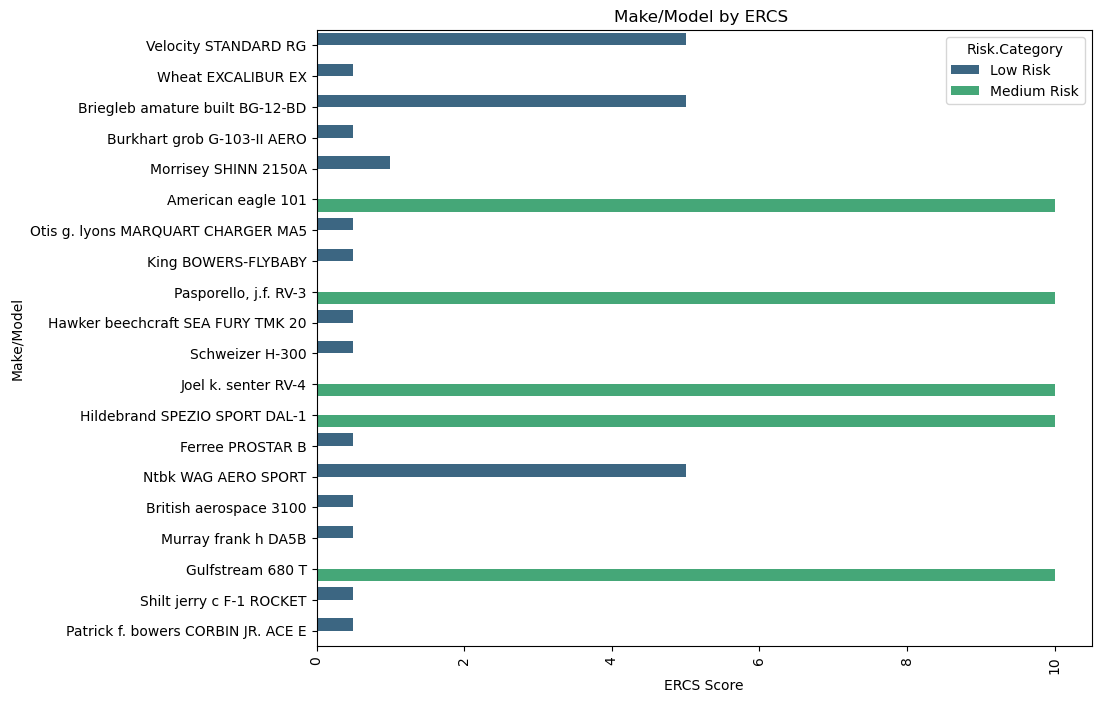

In [59]:
'''Here, I am combining risk factors number of incidents, Risk score and Category to try and determine which has the lowest risk'''
#plot ERCS score per Make/Model
plt.figure(figsize = (10,8))

#create a make/model column
low_20_ercs = aviation_cleaned_copy6.sort_values(by='Incident.Count').head(20)
low_20_ercs['Make/Model'] = low_20_ercs['Make'] + ' ' + low_20_ercs['Model']

#plot the barplot
sns.barplot(x = 'ERCS.Score', y='Make/Model',  hue = 'Risk.Category', data = low_20_ercs, palette ='viridis', orient='h')
plt.title('Make/Model by ERCS ')
plt.ylabel('Make/Model')
plt.xlabel('ERCS Score')

plt.xticks(rotation=90);
# plt.legend();

We notice that quite a number of Make/Model combinations have an ERCS score of 0 (i.e `1278` records). They contribute to 1.44% of our dataset. 
Upon inspection, I noticed that they have no values for `Total.Fatal.Injuries`, `Total.Serious.Injuries`,`Total.Minor.Injuries` and `Total.Uninjured` columns. Since this columns are important and relevant in computing the ERCS score, I decided to drop records where all these columns were 0. 

In [60]:
aviation_cleaned_copy6.shape

(88744, 19)

In [61]:
# Check if the sum of the specified columns is equal to 0 for each row
# Check if each of the specified columns is equal to 0 for each row
mask = ((aviation_cleaned_copy6['Total.Fatal.Injuries'] == 0) &
        (aviation_cleaned_copy6['Total.Serious.Injuries'] == 0) &
        (aviation_cleaned_copy6['Total.Minor.Injuries'] == 0) &
        (aviation_cleaned_copy6['Total.Uninjured'] == 0))

# Filter out rows where all specified columns are 0
aviation_filtered = aviation_cleaned_copy6[~mask]
# Filter out rows where the sum of the specified columns is equal to 0.
'''Here, the (~) operator signifies the not python operator. Thus for this case we are remaining with the data with no 0 values for either of 
the columns'''
aviation_filtered = aviation_cleaned_copy6[~mask]

# Save the filtered DataFrame back to a CSV file or use it for further analysis
aviation_filtered.to_csv('filtered_aviation_data.csv', index=False)

In [62]:
aviation_filtered.shape

(87466, 19)

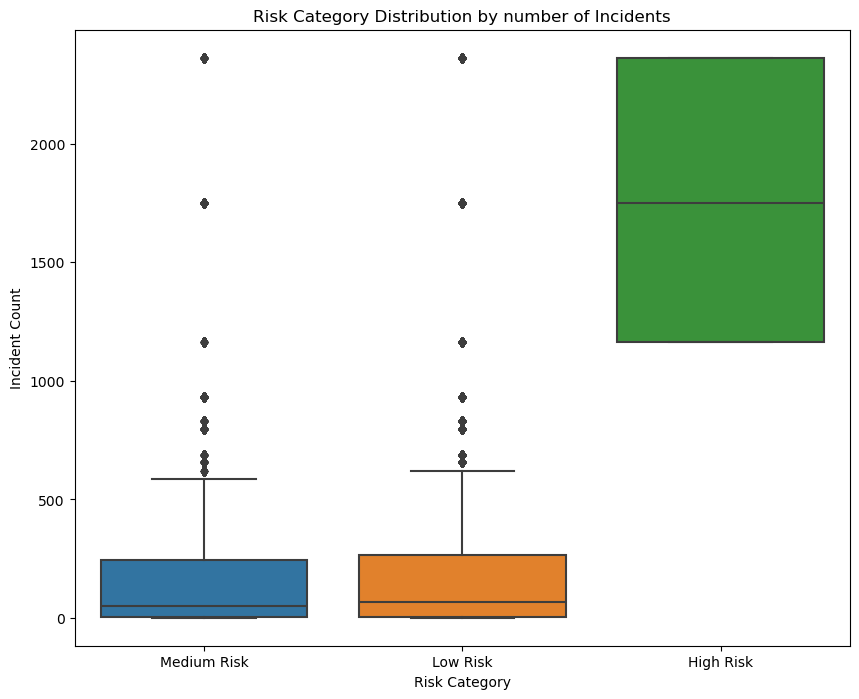

In [63]:
#plot graph to show the datset distribution of Risk categories
plt.figure(figsize = (10,8))

# sns.barplot(x = 'Risk.Category', y = 'Incident.Count', data = aviation_cleaned_copy6, palette='viridis')
sns.boxplot(x = 'Risk.Category', y = 'Incident.Count', data=aviation_cleaned_copy6)
plt.title('Risk Category Distribution by number of Incidents')
plt.xlabel ('Risk Category')
plt.ylabel('Incident Count');
# plt.legend(['text'], loc = 'upper right');

## 7. Conclusions

1. Most aircraft Accidents/Incidents occurred during VMC(Visual Meteorological Conditions). 

## 8. Recommendations

1. Given that VMC is recommended for flying, further investigation should be carried out as to what else could be contributing to this high accidents rate.